In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [5]:
model = Sequential([
        Flatten(input_shape = (28,28)),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
])

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
r =model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=2)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.5699 - accuracy: 0.7574 - val_loss: 0.5426 - val_accuracy: 0.8824
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6021 - accuracy: 0.8434 - val_loss: 0.4041 - val_accuracy: 0.9158
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4877 - accuracy: 0.8684 - val_loss: 0.3397 - val_accuracy: 0.9154
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4235 - accuracy: 0.8881 - val_loss: 0.3193 - val_accuracy: 0.9265
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3869 - accuracy: 0.8995 - val_loss: 0.3143 - val_accuracy: 0.9307
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3686 - accuracy: 0.9055 - val_loss: 0.2777 - val_accuracy: 0.9428
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3538 - accuracy: 0.9086 - val_loss: 0.2665 - val_accuracy:

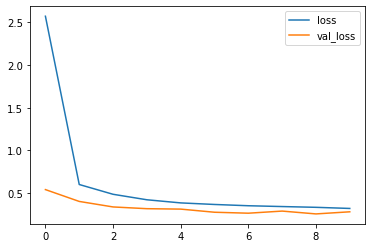

In [9]:
#plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

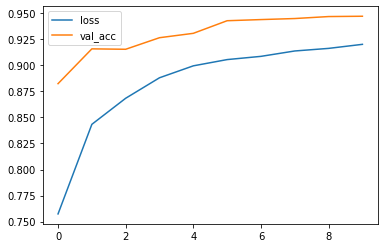

In [11]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='loss')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [12]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.2828 - accuracy: 0.9471
[0.28282028436660767, 0.9470999836921692]


Confusion Matrix, without Normalization
[[ 958    0    1    0    0    1    7    1   12    0]
 [   0 1115    4    0    0    0    3    0   13    0]
 [   1    2  973   11    2    0    4    9   28    2]
 [   1    1    9  953    0   12    0    8   25    1]
 [   0    0    3    0  931    0    6    4   21   17]
 [   5    1    1   18    2  828   14    0   21    2]
 [   8    3    0    0    2   11  929    0    5    0]
 [   4   12   15    6    2    0    0  969   10   10]
 [   8    0    3   13    7    6    6    3  926    2]
 [   6    4    2   14   45    8    1    8   32  889]]


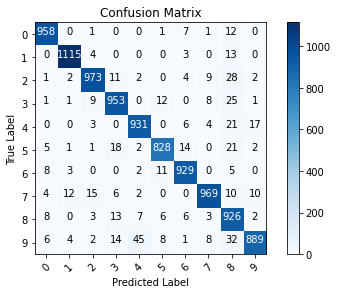

In [16]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize= False, title='Confusion Matrix', cmap=plt.cm.Blues):

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix, without Normalization")
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

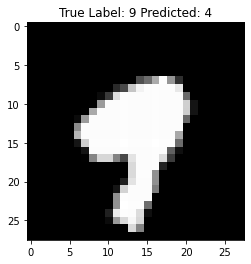

In [20]:
misclassified_idx = np.where(p_test !=y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap = 'gray')
plt.title("True Label: %s Predicted: %s" % (y_test[i], p_test[i]));